In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [23]:
traces = {"bc": ["bc-0","bc-12","bc-3","bc-5"],"bfs":["bfs-10","bfs-14","bfs-3","bfs-8"],"cc":["cc-13","cc-14","cc-5","cc-6"],"sssp":["sssp-10","sssp-14","sssp-3","sssp-5"]}
bins = ["coverage_-2","coverage_-1","coverage_0","coverage_1","coverage_2"]
totLines = 65536

final_data_allocated = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_shared = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_coreOne = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_coreZero = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}

for binary in bins:
    final_data_allocated["average"].append(0)
    final_data_shared["average"].append(0)
    final_data_coreOne["average"].append(0)
    final_data_coreZero["average"].append(0)

for trace in traces:
    for binary in bins:
        allocatedLines = 0.0
        sharedLines = 0.0
        uniqueCoreOneLines = 0.0
        uniqueCoreZeroLines = 0.0
        for trace_sim in traces[trace]:
            data = pd.read_csv("line_counts/" + binary + trace_sim + ".trace.csv")
            core_0 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 0 lines "])
            core_1 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 1 lines"])
            allocatedLines += ((len(data[(data[" Core 0 lines "] != 0) | (data[" Core 1 lines"] != 0)]))/(65536 * len(traces[trace])))
            sharedLines += ((len(data[(data[" Core 0 lines "] != 0) & (data[" Core 1 lines"] != 0)]))/(65536*len(traces[trace])))
            uniqueCoreOneLines += ((len(data[(data[" Core 1 lines"] != 0) & (data[" Core 0 lines "] == 0)]))/(65536 * len(traces[trace])))
            uniqueCoreZeroLines += ((len(data[(data[" Core 1 lines"] == 0) & (data[" Core 0 lines "] != 0)]))/(65536 * len(traces[trace])))
        final_data_allocated[trace].append(allocatedLines)
        final_data_shared[trace].append(sharedLines)
        final_data_coreOne[trace].append(uniqueCoreOneLines)
        final_data_coreZero[trace].append(uniqueCoreZeroLines)
        

for trace in traces:
    for i in range(len(bins)):
        final_data_allocated["average"][i] += final_data_allocated[trace][i]/len(traces[trace])
        final_data_shared["average"][i] += final_data_shared[trace][i]/len(traces[trace])
        final_data_coreOne["average"][i] += final_data_coreOne[trace][i]/len(traces[trace])
        final_data_coreZero["average"][i] += final_data_coreZero[trace][i]/len(traces[trace])

print("final allocated fractions: ",final_data_allocated)
print("final shared fraction: ",final_data_shared)
print("final core1 unique fraction: ",final_data_coreOne)
print("final core0 unique fraction: ",final_data_coreZero)

final allocated fractions:  {'bc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893394470214844], 'bfs': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893356323242188], 'cc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893165588378906], 'sssp': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893280029296875], 'average': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669456481933594, 0.8893299102783203]}
final shared fraction:  {'bc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056427001953125, 0.8440017700195312], 'bfs': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8435897827148438], 'cc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056198120117188, 0.84332275390625], 'sssp': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import os
def plot_multibar(data,group_labels ,savepath, is_mpki,ylabel="",round_to = 0.05, ytick_trim=1,delta_round = 0.01,delta_factor = 1):
    # Extracting the keys (workload names) and the values (list of measurements) from the data
    workloads = list(data.keys())
    values = np.array(list(data.values()))
    maximum = np.max(values)
    minimum = np.min(values)

    print(group_labels)
    print(data)
    # print_ascii_table(os.path.basename(savepath),group_labels, data)
    print("Max:" , maximum)
    print("Min:", minimum)
    n_bars = len(workloads)
    n_sets = values.shape[1]  
    bar_width = min(min(0.3,0.8/ n_sets),n_bars*(0.04))  # Width of each bar, divided by the number of sets
    
    index = np.arange(n_bars)
    fig, ax = plt.subplots(figsize=(12, 6),constrained_layout = True)  # Fixed plot size (12x6 inches)
    
    # Plot each set of bars with grayscale colors
    for i in range(n_sets):
        # Grayscale shading: Ensure valid scaling for multiple sets
        gray_shade = 0.5 if n_sets == 1 else 1 - (i / max(1, n_sets))

        # Center bars around the index
        bar_position = index + (i - (n_sets - 1) / 2) * bar_width
        # Plot bars with edge coloring
        ax.bar(bar_position, values[:, i], bar_width, 
            label=(group_labels[i] if group_labels else ""), 
            color=str(gray_shade,), edgecolor='black', linewidth=1.5,zorder=5)
    # Add labels, title, and custom x-axis tick labels
    if ylabel=="":
        ylabel = "LLC MPKI" if is_mpki else "Speedup"
    ax.set_ylabel(ylabel, fontsize=28)

    tick_count = 10
   
    delta = int(((maximum - minimum )/tick_count)/delta_round)*delta_round*delta_factor

    print("Delta:", delta)
    plt.ylim(max(0, (int(minimum / round_to)-1) * round_to),maximum + 1*delta)
    ax.set_yticks(np.arange(max(0, (int(minimum / round_to)-1) * round_to), maximum + delta,delta))
    
    ax.tick_params(axis='y', labelsize=20, labelcolor='black')
    plt.setp(ax.get_yticklabels(), fontweight=500)
    ax.set_xticks(index)
    ax.set_xticklabels(workloads, fontsize=26,rotation=60, ha='center',fontweight=500)  # Center labels under each group of bars
   
    ax.yaxis.set_major_formatter(FormatStrFormatter(f'%.{ytick_trim}f'))

    # Add a grid with dotted lines on the y-axis
    for spine in ax.spines.values():
        spine.set_zorder(10)
        spine.set_edgecolor('black')  # Set color of the border
        spine.set_linewidth(3)  # Set the thickness of the border

    # Add legend at the top of the plot
    
    if(n_sets >1):
        legend = ax.legend(loc='center',bbox_to_anchor=(0.5,1.15), ncol=n_sets,fontsize=26,edgecolor='black',fancybox=False, bbox_transform=ax.transAxes)
        legend.get_frame().set_linewidth(2)
        fig.subplots_adjust(top=0.8,left=0.1, right=0.9)
    else:
        legend = ax.legend(loc='center',bbox_to_anchor=(0.5,1.15), ncol=n_sets,fontsize=26,edgecolor='black',fancybox=False, bbox_transform=ax.transAxes)
        legend.get_frame().set_linewidth(0)
        fig.subplots_adjust(top=0.8,left=0.1, right=0.9)
    # Adjust layout to avoid overlap
    # plt.tight_layout()
    # if(not is_mpki):
    #    plt.axhline(y=1, color='r', linestyle='dotted', linewidth=1.5)
    ax.grid(axis='y', linestyle=':', linewidth=1, color='black', alpha=0.5, zorder=1)
    ax.set_axisbelow(True)

    # plt.text(1.87,4,"0.01",fontsize=26,rotation=90)
    # plt.text(8.87,4,"0.01",fontsize=26,rotation=90)
    # plt.text(4.87,4,"0.05",fontsize=26,rotation=90)
    # Save the plot to the specified path
    plt.savefig(savepath,dpi = 800,bbox_inches='tight')



['-2', '-1', '0', '1', '2']
{'bc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893394470214844], 'bfs': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893356323242188], 'cc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893165588378906], 'sssp': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893280029296875], 'average': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669456481933594, 0.8893299102783203]}
Max: 0.966949462890625
Min: 0.3677215576171875
Delta: 0.1


/tmp/ipykernel_2154/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056427001953125, 0.8440017700195312], 'bfs': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8435897827148438], 'cc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056198120117188, 0.84332275390625], 'sssp': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8436393737792969], 'average': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056350708007812, 0.8436384201049805]}
Max: 0.8440017700195312
Min: 0.047027587890625
Delta: 0.14


/tmp/ipykernel_2154/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.130615234375, 0.022762298583984375], 'bfs': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.13061141967773438, 0.022945404052734375], 'cc': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.1306304931640625, 0.023090362548828125], 'sssp': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.13061141967773438, 0.022922515869140625], 'average': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.1306171417236328, 0.022930145263671875]}
Max: 0.2312469482421875
Min: 0.022762298583984375
Delta: 0.05


/tmp/ipykernel_2154/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.02257537841796875], 'bfs': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.022800445556640625], 'cc': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.13069915771484375, 0.0229034423828125], 'sssp': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.02276611328125], 'average': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306934356689453, 0.02276134490966797]}
Max: 0.2306365966796875
Min: 0.02257537841796875
Delta: 0.05


/tmp/ipykernel_2154/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


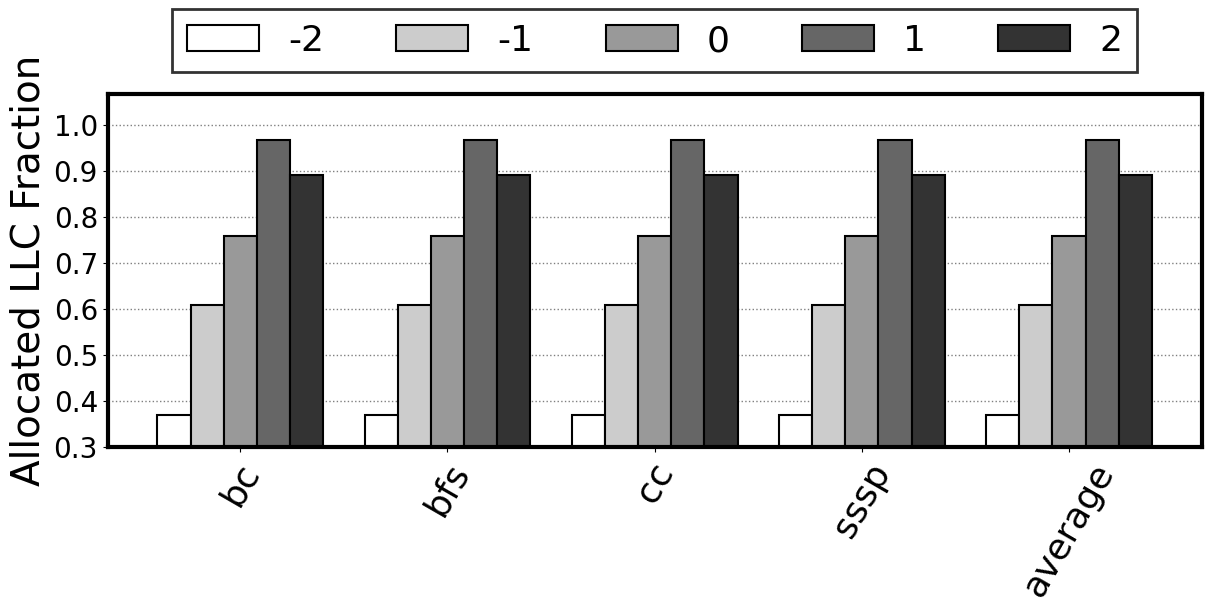

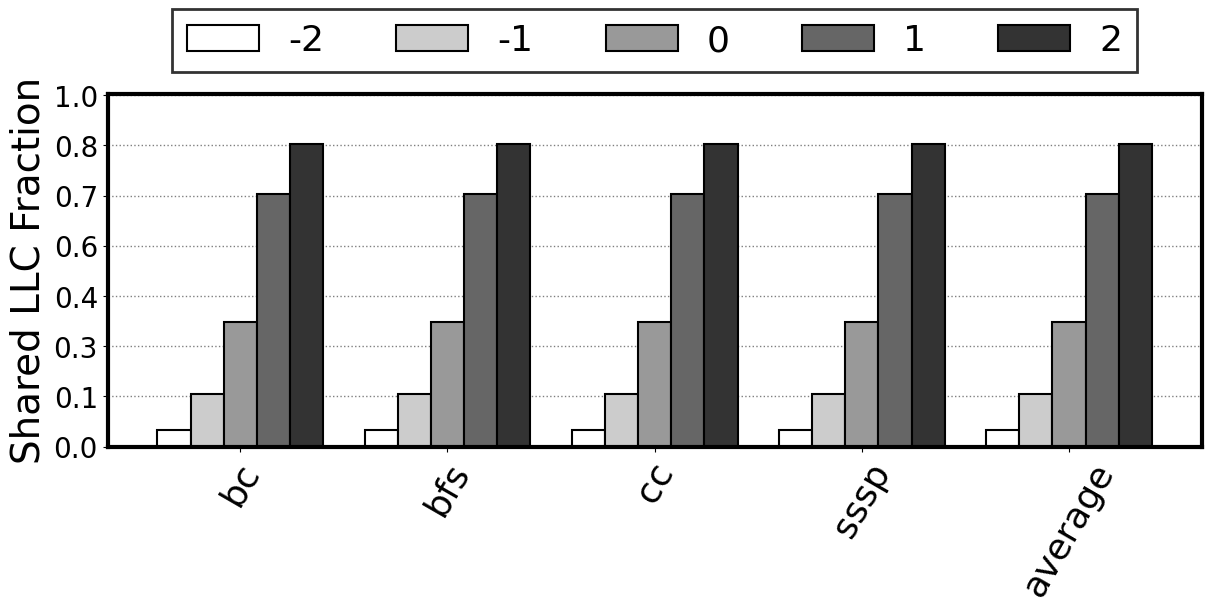

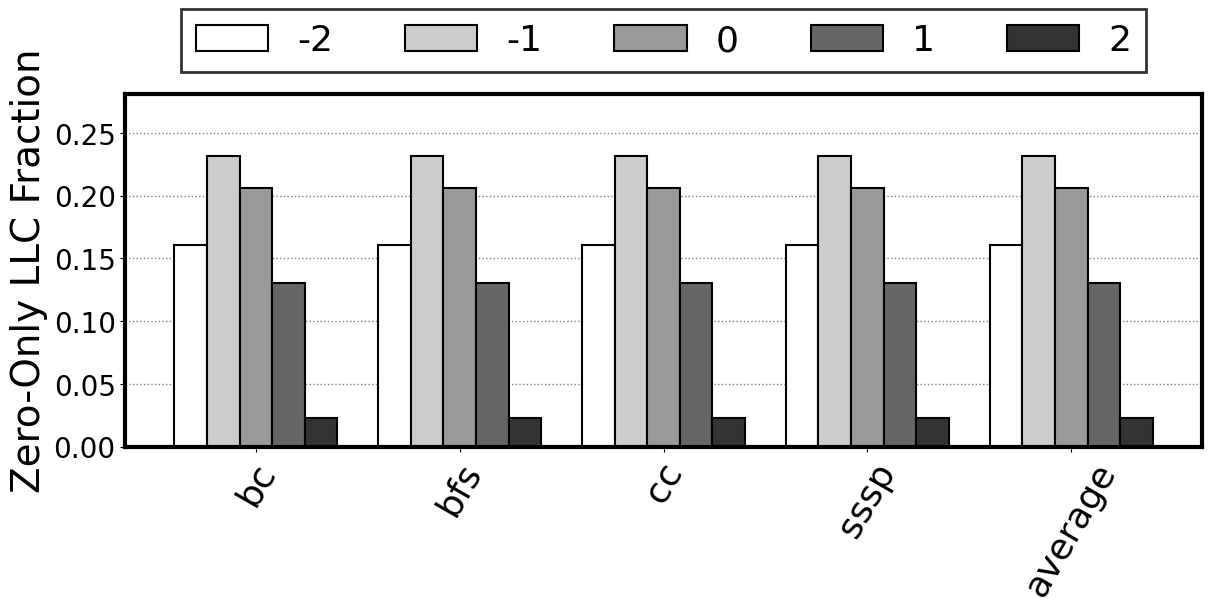

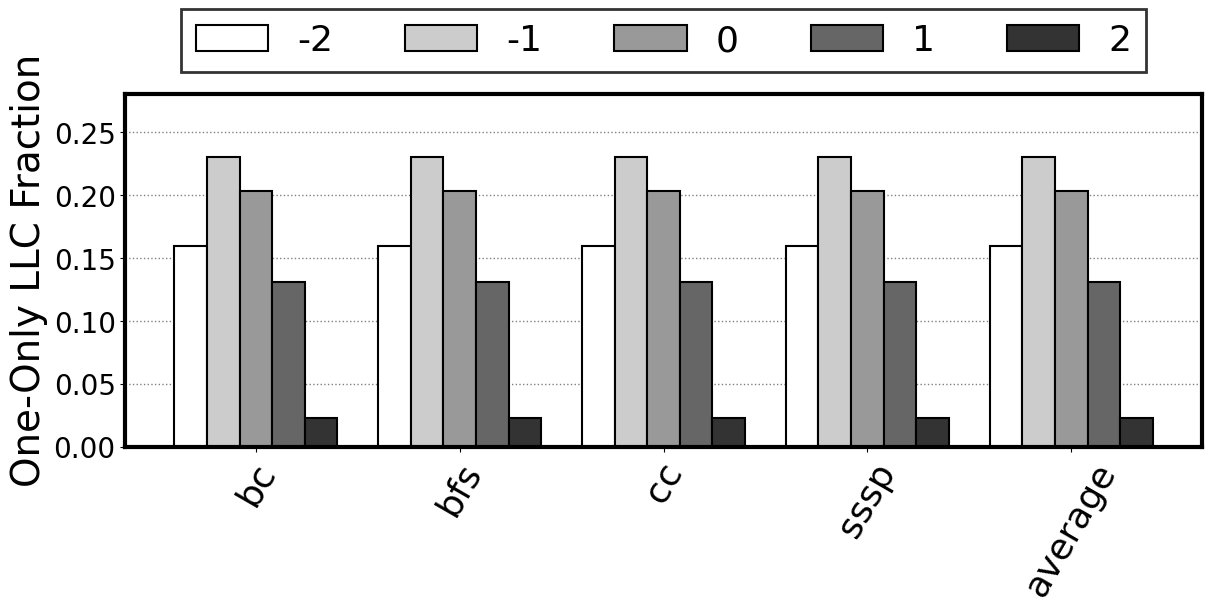

In [47]:

# print("final allocated fractions: ",final_data_allocated)
# print("final shared fraction: ",final_data_shared)
# print("final core1 unique fraction: ",final_data_coreOne)
# print("final core0 unique fraction: ",final_data_coreZero)

plot_multibar(final_data_allocated,["-2","-1","0","1","2"],"./plots/allocated.pdf",is_mpki=False,delta_factor=2,ylabel="Allocated LLC Fraction")
plot_multibar(final_data_shared,["-2","-1","0","1","2"],"./plots/shared.pdf",is_mpki=False,delta_factor=2,ylabel="Shared LLC Fraction")
plot_multibar(final_data_coreZero,["-2","-1","0","1","2"],"./plots/coreZero.pdf",is_mpki=False,delta_factor=2.5,ylabel="Zero-Only LLC Fraction",ytick_trim=2)
plot_multibar(final_data_coreOne,["-2","-1","0","1","2"],"./plots/coreOne.pdf",is_mpki=False,delta_factor=2.5,ylabel="One-Only LLC Fraction",ytick_trim=2)